# Encoding Starling

- **Encoding** değişkenlerin temsil şekillerinin değiştirilmesidir.
### Label Encoding & Binary Encoding
- Kategorik değişkenlerin sınıflarını yeniden kodlamak demektir.
- mesela education yani eğitim açısından düşündüğümüzde ilkokul 0'ken PHD 5 olarak kodlanır.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.options.display.max_columns = None

def load_application_train():
    data = pd.read_csv("datasets/application_train.csv")
    return data


df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [43]:
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [44]:

df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

#### Encoding neden uygulanır
Veri setini, makine öğrenmesi yöntemlerini kullanmak istediğimizde algoritmaların istediği (aradığı) veri seti yapısına çevirmek için encoding uygulanır. (İstenilen standarta çevirmek için)

In [45]:
le = LabelEncoder() # LabelEncoder() ile tanımlama yapılır.
le.fit_transform(df["Sex"])[0:5] 

array([1, 0, 0, 0, 1])

In [46]:
le.inverse_transform([0,1]) 

array(['female', 'male'], dtype=object)

In [47]:
def labelEncoder(dataframe, binaryCol):
    labelEncoder = LabelEncoder()
    dataframe[binaryCol] = labelEncoder.fit_transform(dataframe[binaryCol])
    return dataframe

In [48]:
# Binary yani iki kategorik degişkene sahip değişkenleri tespit edelim.
binaryCols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]  #unique().len() == 2 diyemeyiz çünkü unique eksik değerleri de sınıf olarak görür. 

binaryCols


['Sex']

In [49]:
for col in binaryCols:
    labelEncoder(df,col)
df[binaryCols].head()
    

,Sex
0,1
1,0
2,0
3,0
4,1


In [50]:
df = load_application_train()
binaryCols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]  #unique().len() == 2 diyemeyiz çünkü unique eksik değerleri de sınıf olarak görür. 

binaryCols


['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'EMERGENCYSTATE_MODE']

In [51]:
for col in binaryCols:
    labelEncoder(df,col)

In [52]:
df[binaryCols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


# One Hot Encoding
- One-Hot Encoding, esasen kategorik değişkenlerin ikili vektörler olarak temsilidir. 
- Bu kategorik değerler ilk olarak tamsayı değerlere eşlenir. 
- Her bir tamsayı değeri daha sonra tamamı 0 olan bir ikili vektör olarak temsil edilir (1 olarak işaretlenen tamsayının dizini hariç).

<img src="https://www.mertmekatronik.com/uploads/images/2020/10/image_750x_5f8c85c715869.jpg">

In [53]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [54]:
pd.get_dummies(df, columns=["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1


In [55]:
pd.get_dummies(df,columns=['Embarked'],drop_first=True).head() #drop_first=True ile ilk sınıfını atıyoruz. Dummy tuzağına düşmeyi önler.
# get_dummies() ile kategorik değerleri dummy değerlerine dönüştürür.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,1


In [56]:
pd.get_dummies(df,columns=['Embarked'],dummy_na=True).head() # dummy_na=True ile NA değerlerini dummy değerine dönüştürür.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1,0


In [57]:
pd.get_dummies(df,columns=['Sex',"Embarked"],drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,1,0,1


get_dummies ile hem label encoding hem de one hot encoding yapılabilir.

In [60]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit

def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False
    
dff = load_application_train()
dff.head()


def grabColNames(dataframe, catTh=10, carTh=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        catTh: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        carTh: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        catCols: list
                Kategorik değişken listesi
        numCols: list
                Numerik değişken listesi
        catButCar: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grabColNames(df))


    Notes
    ------
        catCols + numCols + catButCar = toplam değişken sayısı
        numButCat catCols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: catCols + numCols + catButCar = değişken sayısı

    """

    # catCols, catButCar
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                 dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                 dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar


catCols, numCols, catButCar = grabColNames(df)

numCols = [col for col in numCols if col not in "PassengerId"]

for col in numCols:
    print(col, checkOutlier(df, col))

catCols, numCols, catButCar = grabColNames(dff)

numCols = [col for col in numCols if col not in "SK_ID_CURR"]

for col in numCols:
    print(col, checkOutlier(dff, col))

Observations: 891
Variables: 12
catCols: 6
numCols: 3
catButCar: 3
numButCat: 4
Age True
Fare True
Observations: 307511
Variables: 122
catCols: 54
numCols: 67
catButCar: 1
numButCat: 39
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE

In [61]:
def oneHotEncoder(dataframe, categoricalCols, drop_first = False):
    dataframe = pd.get_dummies(dataframe, columns=categoricalCols,drop_first=drop_first)
    return dataframe

In [62]:
df = load()
catCols, numCols, catButCar = grabColNames(df)

Observations: 891
Variables: 12
catCols: 6
numCols: 3
catButCar: 3
numButCat: 4


In [63]:
catCols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [64]:
oheCols = [col for col in df.columns if 10 >= df[col].nunique() > 2] # benzersiz sınıfların sayısı 10'dan küçük ve 2'den büyük olan değişkenleri seçelim

oneHotEncoder(df, oheCols, drop_first=True).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


# Rare Encoding
- Ayırt edici olmayan gözlemlerden (one hot encoding sonrası değişken) kurtulmayı sağlar.
- Yararlı olduğu kadar zararlı da olabilir.

1. Kategorik değişkenlerin azlık-çokluk durumunun analiz edilmesi
2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi
3. Rare encoder yazacağız.

In [68]:
catCols,numCols,catButCar = grabColNames(df)
def catSummary(dataframe, colName, plot=False):
    print(pd.DataFrame({colName: dataframe[colName].value_counts(),
                        "Ratio": 100 * dataframe[colName].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[colName], data=dataframe)
        plt.show(block=True)


Observations: 307511
Variables: 122
catCols: 54
numCols: 67
catButCar: 1
numButCat: 39


In [69]:
for col in catCols:
    catSummary(df, col)

                 NAME_CONTRACT_TYPE  Ratio
Cash loans                   278232 90.479
Revolving loans               29279  9.521
##########################################
     CODE_GENDER  Ratio
F         202448 65.834
M         105059 34.164
XNA            4  0.001
##########################################
   FLAG_OWN_CAR  Ratio
N        202924 65.989
Y        104587 34.011
##########################################
   FLAG_OWN_REALTY  Ratio
Y           213312 69.367
N            94199 30.633
##########################################
                 NAME_TYPE_SUITE  Ratio
Unaccompanied             248526 80.819
Family                     40149 13.056
Spouse, partner            11370  3.697
Children                    3267  1.062
Other_B                     1770  0.576
Other_A                      866  0.282
Group of people              271  0.088
##########################################
                      NAME_INCOME_TYPE  Ratio
Working                         158774 51.632
C

In [70]:

# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi

df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [71]:
# Değişkenlerin başka bir değişkene kırılımında birbirinden çok farklı değişkenlerin rare encoding sonucu birleştirilmesinin başarısı düşünülmelidir.
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()
# Unemployed (İşsiz) ve Student (Öğrenci) değişkenlerinin targetları birbirinden çok farklı oldukları halde az gözlem sayısı oldukları halde rare encoding ile birleştirilmeli midir?

NAME_INCOME_TYPE
Businessman            0.000
Commercial associate   0.075
Maternity leave        0.400
Pensioner              0.054
State servant          0.058
Student                0.000
Unemployed             0.364
Working                0.096
Name: TARGET, dtype: float64

In [73]:
# Bu analizi tüm kategorik değişkenlerde yapmak için fonksiyon yazalım.
def rareAnalyzer(dataframe, target, catCols):
    for col in  catCols:
        print(col,":",len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),"RATIO": dataframe[col].value_counts() / len(dataframe),"TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [74]:
rareAnalyzer(df,"TARGET",catCols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


CODE_GENDER : 3
      COUNT  RATIO  TARGET_MEAN
F    202448  0.658        0.070
M    105059  0.342        0.101
XNA       4  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


NAME_TYPE_SUITE : 7
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Group of people     271  0.001        0.085
Other_A             866  0.003        0.088
Other_B            1770  0.006        0.098
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


NAME_INCOME_TYPE : 8
                       COUNT  RATIO  TARGET_MEAN
Businessman               10  0.

In [76]:
def rareEncoder(dataframe, rarePerc):
    tempDf = dataframe.copy()
    rare_columns = [col for col in tempDf.columns if tempDf[col].dtypes == "O" and (tempDf[col].value_counts() / len(tempDf) < rarePerc).any(axis = None)]
    for var in rare_columns:
        tmp = tempDf[var].value_counts() / len(tempDf)
        rareLabels = tmp[tmp < rarePerc].index
        tempDf[var] = np.where(tempDf[var].isin(rareLabels), "Rare", tempDf[var])
    return tempDf

In [77]:
newDf =  rareEncoder(df, 0.01) # Toplulaştırma yapılmış dataframe.
rareAnalyzer(newDf,"TARGET",catCols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


CODE_GENDER : 3
       COUNT  RATIO  TARGET_MEAN
F     202448  0.658        0.070
M     105059  0.342        0.101
Rare       4  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


NAME_TYPE_SUITE : 5
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Rare               2907  0.009        0.094
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


NAME_INCOME_TYPE : 5
                       COUNT  RATIO  TARGET_MEAN
Commercial associate   71617  0.233        0.075
Pensioner              55362  0.180        0.054
Rare              

# Özellik Ölçeklendirme ( Feature Scaling )
- Tüm değişkenler eşit şartlar altında değerlendirilebilmek için ölçeklendirilmelidir.

- Eğitim sürelerini kısaltmak için (Hata yönetimi ve hataların daha kısa sürede çözülmesi)

- Uzaklık temelli yöntemlerde büyük değerler dominantlık göstermektedirler.

1. Yöntem **StandartScaler**: Klasik standarlaştırma. Ortalamayı çıkar, standart sapmaya böl. z = (x - u) / s

In [79]:
df = load()
ss = StandardScaler()
df["Age_standart_scaled"] = ss.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standart_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


2. RobustScaler: Medyanı çıkar IQR'a böl.


In [80]:
rs = RobustScaler()
df["Age_robust_scaled"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standart_scaled,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robust_scaled,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


3. MinMaxScaler: Verilen 2 değer arasında değişken dönüşümü.

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) X_scaled = X_std * (max - min) + min

In [82]:
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standart_scaled,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robust_scaled,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_min_max_scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standart_scaled,Age_robust_scaled,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435


count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


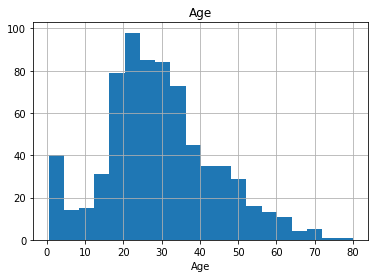

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standart_scaled, dtype: float64


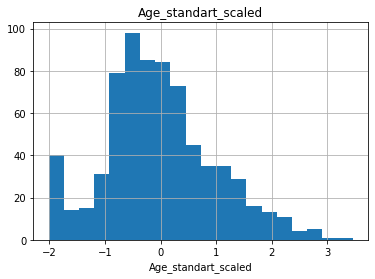

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robust_scaled, dtype: float64


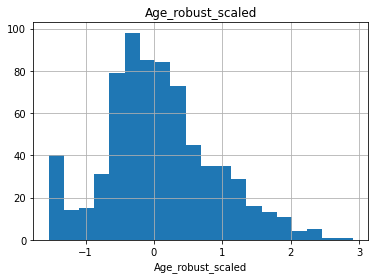

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


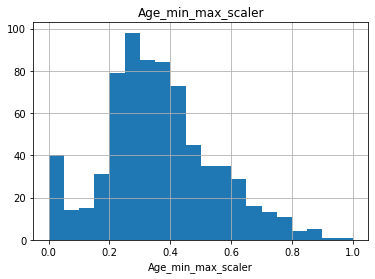

In [84]:
ageCols = [col for col in df.columns if "Age" in col]
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
    print(dataframe[numericalCol].describe(quantiles).T)

    if plot:
        dataframe[numericalCol].hist(bins=20)
        plt.xlabel(numericalCol)
        plt.title(numericalCol)
        plt.show(block=True)
for col in ageCols:
    numSummary(df,col,plot=True)